In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df=pd.read_csv(r"C:\Users\90530\Desktop\laptop_price\data.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [3]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'brand', 'name', 'price', 'spec_rating',
       'processor', 'CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type', 'GPU',
       'display_size', 'resolution_width', 'resolution_height', 'OS',
       'warranty'],
      dtype='object')

In [4]:
df.shape

(893, 18)

In [5]:
df.dtypes # Burada değişkenlerimin türlerine bakıyorum.

Unnamed: 0.1           int64
Unnamed: 0             int64
brand                 object
name                  object
price                  int64
spec_rating          float64
processor             object
CPU                   object
Ram                   object
Ram_type              object
ROM                   object
ROM_type              object
GPU                   object
display_size         float64
resolution_width     float64
resolution_height    float64
OS                    object
warranty               int64
dtype: object

In [6]:
df.isnull().values.any() # Hiç eksik değer var mı diye sorguladığımda FALSE geldi yani  veri setimde eksik değerler yok.

False

In [7]:
df.isnull().sum() #eksik veriler var mı diye kontrol ediyorum.
#Burada eksik veri yok ama olsaydı şu metodu kullanacaktım. df["column_adı"].fillna(0 , inplace=True) 
#eksik veri çıksaydı bunun  için yapabileceğim üç seçenek var; 
#eksik verilerilerin satırlarını kaldır
#eksik veri içeren kategorideki eksik verilerin yerine 0 yazmak
#eksik veri yerine sütün ortalamaso ya da medyan yazılır

Unnamed: 0.1         0
Unnamed: 0           0
brand                0
name                 0
price                0
spec_rating          0
processor            0
CPU                  0
Ram                  0
Ram_type             0
ROM                  0
ROM_type             0
GPU                  0
display_size         0
resolution_width     0
resolution_height    0
OS                   0
warranty             0
dtype: int64

In [8]:
df.info() #Burada 4 tane float değişkenm, 4 tane int feğişkenim ve 10 tane kategorik değişkenim olduğunu görüyorum.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       893 non-null    int64  
 1   Unnamed: 0         893 non-null    int64  
 2   brand              893 non-null    object 
 3   name               893 non-null    object 
 4   price              893 non-null    int64  
 5   spec_rating        893 non-null    float64
 6   processor          893 non-null    object 
 7   CPU                893 non-null    object 
 8   Ram                893 non-null    object 
 9   Ram_type           893 non-null    object 
 10  ROM                893 non-null    object 
 11  ROM_type           893 non-null    object 
 12  GPU                893 non-null    object 
 13  display_size       893 non-null    float64
 14  resolution_width   893 non-null    float64
 15  resolution_height  893 non-null    float64
 16  OS                 893 non

In [9]:
kat = df.select_dtypes( include=["object"])
kat.head() # burada sadece kategorik değişkenlerimi seçtim ve bu kategorik değişkenleri belirledim.

,brand,name,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,OS
0,HP,Victus 15-fb0157AX Gaming Laptop,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,Windows 11 OS
1,HP,15s-fq5007TU Laptop,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,Windows 11 OS
2,Acer,One 14 Z8-415 Laptop,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,Windows 11 OS
3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,Windows 11 OS
4,Apple,MacBook Air 2020 MGND3HN Laptop,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,Mac OS


In [10]:
kat.brand.unique() # burada kategorik değişkenlerin sınıflarına ve sınıf sayısına eriştim.

array(['HP', 'Acer', 'Lenovo', 'Apple', 'Dell', 'Asus', 'Samsung',
       'Ultimus', 'Primebook', 'MSI', 'Infinix', 'Wings', 'Honor',
       'Zebronics', 'Xiaomi', 'iBall', 'Chuwi', 'Realme', 'Avita',
       'Walker', 'Huawei', 'Tecno', 'Gigabyte', 'Vaio', 'Microsoft',
       'Fujitsu', 'LG', 'Ninkear', 'Razer', 'AXL'], dtype=object)

In [11]:
kat["brand"].value_counts().count() #kategori değişkenimin 30 sınıfı var ve isimleri yukarıdaki kodda yazıyor.

30

In [12]:
kat["brand"].value_counts() # kategorik değişkenlerimin frekanslarını buldum.


brand
HP           186
Lenovo       169
Asus         157
Dell         107
Acer          84
MSI           65
Samsung       28
Apple         16
Infinix       15
LG             9
Xiaomi         8
Gigabyte       8
Fujitsu        6
Zebronics      4
Ultimus        4
Tecno          3
Wings          3
Chuwi          3
Realme         3
Microsoft      2
AXL            2
Huawei         2
Honor          2
Walker         1
Vaio           1
Avita          1
Primebook      1
Ninkear        1
Razer          1
iBall          1
Name: count, dtype: int64

<Axes: ylabel='brand'>

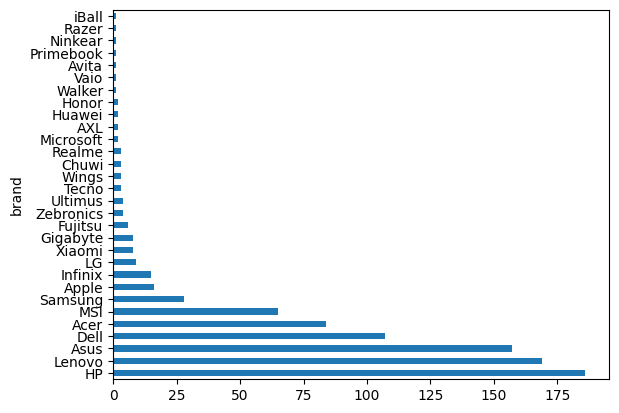

In [13]:
df["brand"]. value_counts().plot.barh() # burada kategorik değişkenlerimin süütun grafiğine baktım, değişkenlerin kaç tane olduğunu daha görsel bir şekilde görmek istedim.

In [14]:
df_num = df.select_dtypes(include =[ "float64" , "int64"]) # sadece sayısal olan değişkenleri çektim.

In [15]:
df_table = df_num["spec_rating"].copy()

<Axes: xlabel='spec_rating'>

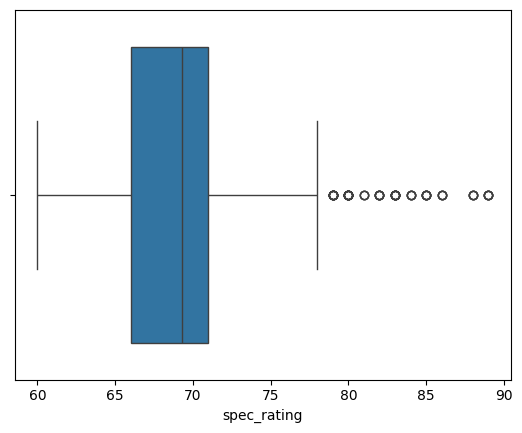

In [16]:
# Aykırı değerleri tespit etmek için en sık kullanılan yöntemlerden birisi kutu grafiği(boxplot) kullanılır.  # 80'den sonra olan çizgide noktalar bulunmaktadır, bunlar diğer gözlem kutusuna dahil edilmediğinden yani çeyreklerin yakınında hiçbir yerde bulunmadığından aykırı değerlerdir. Gragiğe baktığımızda , veri noktalarının çoğunun 65-70 milyon arasında olduğunu söyleyebiliriz, ancak sağdaki noktalar populasyondan uzakta olduğundan aykırı noktalardır.
sns.boxplot(x = df_table)

In [17]:
df_num["price"].describe() # sadece fiyat değişkenini incelemek için fiyat kategorisini inceledim.

count       893.000000
mean      79907.409854
std       60880.043823
min        9999.000000
25%       44500.000000
50%       61990.000000
75%       90990.000000
max      450039.000000
Name: price, dtype: float64

<Figure size 1800x800 with 0 Axes>

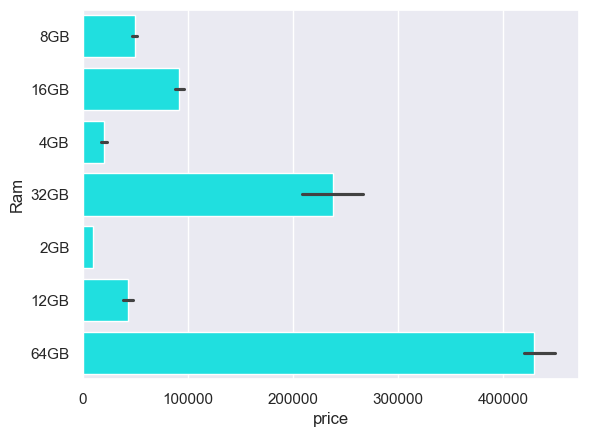

<Figure size 1800x800 with 0 Axes>

In [18]:
sns.set(style="darkgrid")    #Ram ile fiyat arasında bir barplot oluşturmak istedim.
sns.barplot(
    x="price",
    y="Ram",
    data= df,
    color="cyan"
)
plt.figure(figsize=(18, 8))

<Figure size 1600x800 with 0 Axes>

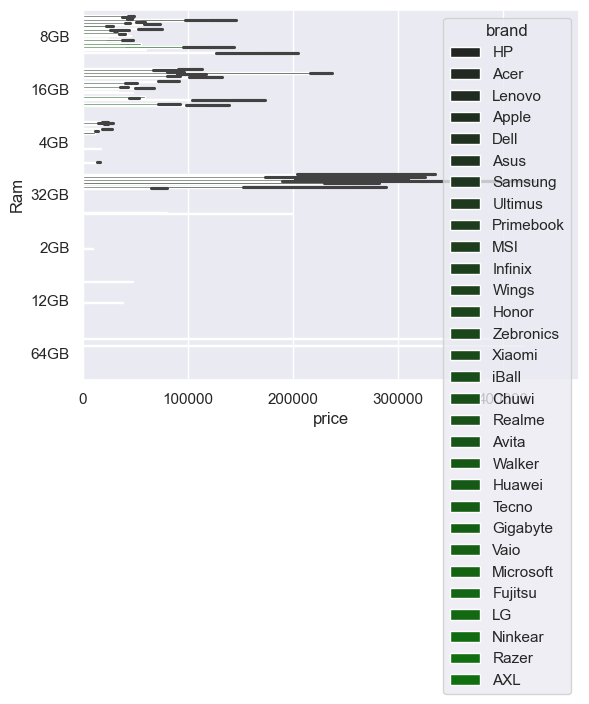

<Figure size 1600x800 with 0 Axes>

In [19]:
sns.barplot(       
    x="price",
    y="Ram",
    hue= "brand",
    data = df,
    palette="dark:green"
)
plt.figure(figsize=(16,8))

<Axes: xlabel='display_size', ylabel='Count'>

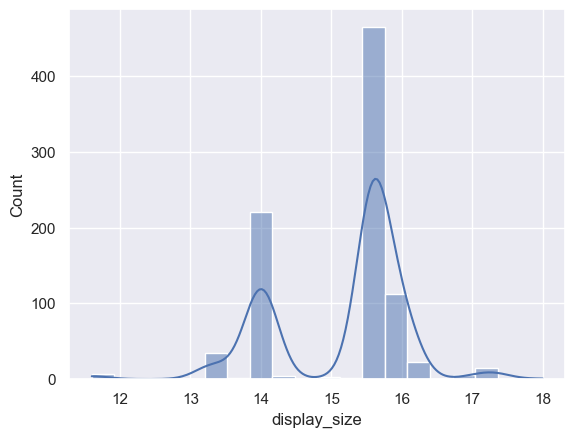

In [20]:
# Markalarla fiyatı histogram grafiğiyle görmek istedim.
sns.histplot( data=df, x="display_size" , kde=True)

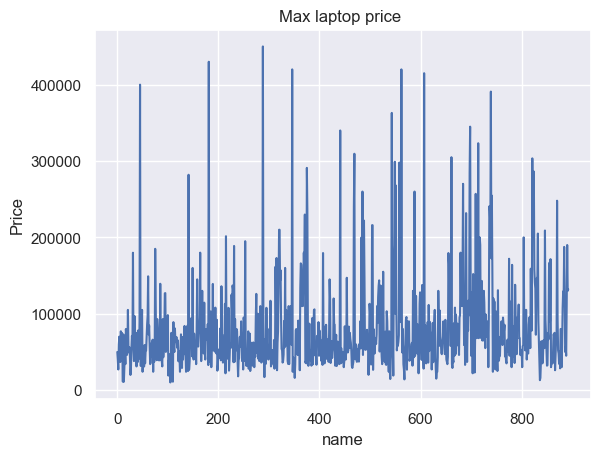

In [21]:
plt.title("Max laptop price ")
plt.ylabel("Price")
plt.xlabel("name")
pricelaptop = df.price
pricelaptop.plot()
plt.show()

In [22]:
df[df["price"] > 20000]

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,926,1015,Asus,Vivobook 15X 2023 K3504VAB-NJ321WS Laptop,44990,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Integrated Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
889,927,1016,Asus,TUF A15 FA577RM-HQ032WS Laptop,110000,71.000000,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",16GB,DDR,1TB,SSD,6GB NVIDIA GeForce RTX 3060,15.6,2560.0,1440.0,Windows 11 OS,1
890,928,1017,Asus,ROG Zephyrus G14 2023 GA402XV-N2034WS Gaming L...,189990,89.000000,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",32GB,DDR5,1TB,SSD,8GB NVIDIA GeForce RTX 4060,14.0,2560.0,1600.0,Windows 11 OS,1
891,929,1018,Asus,TUF Gaming F15 2023 FX507VU-LP083WS Gaming Laptop,129990,73.000000,13th Gen Intel Core i7 13700H,"14 Cores (6P + 8E), 20 Threads",16GB,DDR4,512GB,SSD,6GB NVIDIA GeForce RTX 4050,15.6,1920.0,1080.0,Windows 11 OS,1


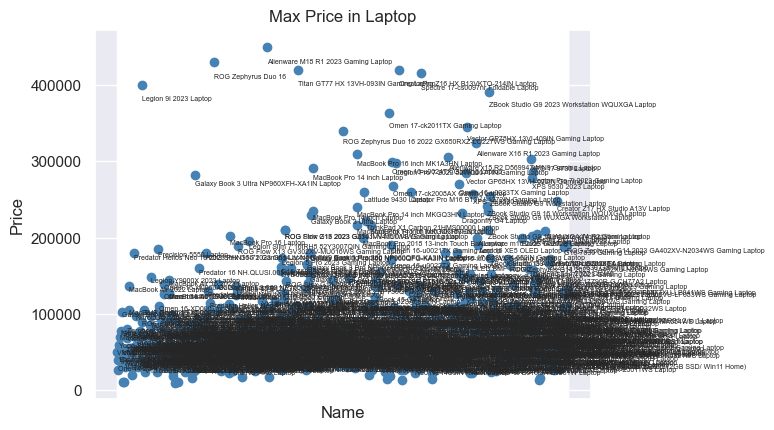

In [23]:
#Label outliers
plt.title( "Max Price in Laptop")
plt.ylabel("Price")
plt.xlabel("Name")
plt.tick_params(axis="both" , which="both", labelbottom=False, bottom=False)

for i in range(len(df)):
    x = df["name"][i]
    y = df["price"][i]
    plt.plot(x, y, "o" , color="steelblue")
    if df["price"][i] > 20000:
        plt.text(x,y * (1 - 0.05), df["name"][i], fontsize=5,)
        
plt.show()

In [24]:
#remove outliers in plot
plt.title("Max Price in laptop")
pt.ylabel("Price")
plt.xlabel("Name")
plt.tick_params(axis="both" , which="both", labelbottom=False, bottom=False)
for i in range(len(df)):
    x = df["name"][i]
    y = df["price"][i]
    if df["name"][i] in not in ["Alienware M1B R1 2023 Gaming Laptop"]:
        plt.plot(x, y, "o" , color="steelblue")
plt.show()


SyntaxError: invalid syntax (971364561.py, line 9)

In [ ]:
sns.lmplot(
    x='price',
    y='display_size',
    data=df,
    hue='brand'

)

C:\Users\90530\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\90530\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


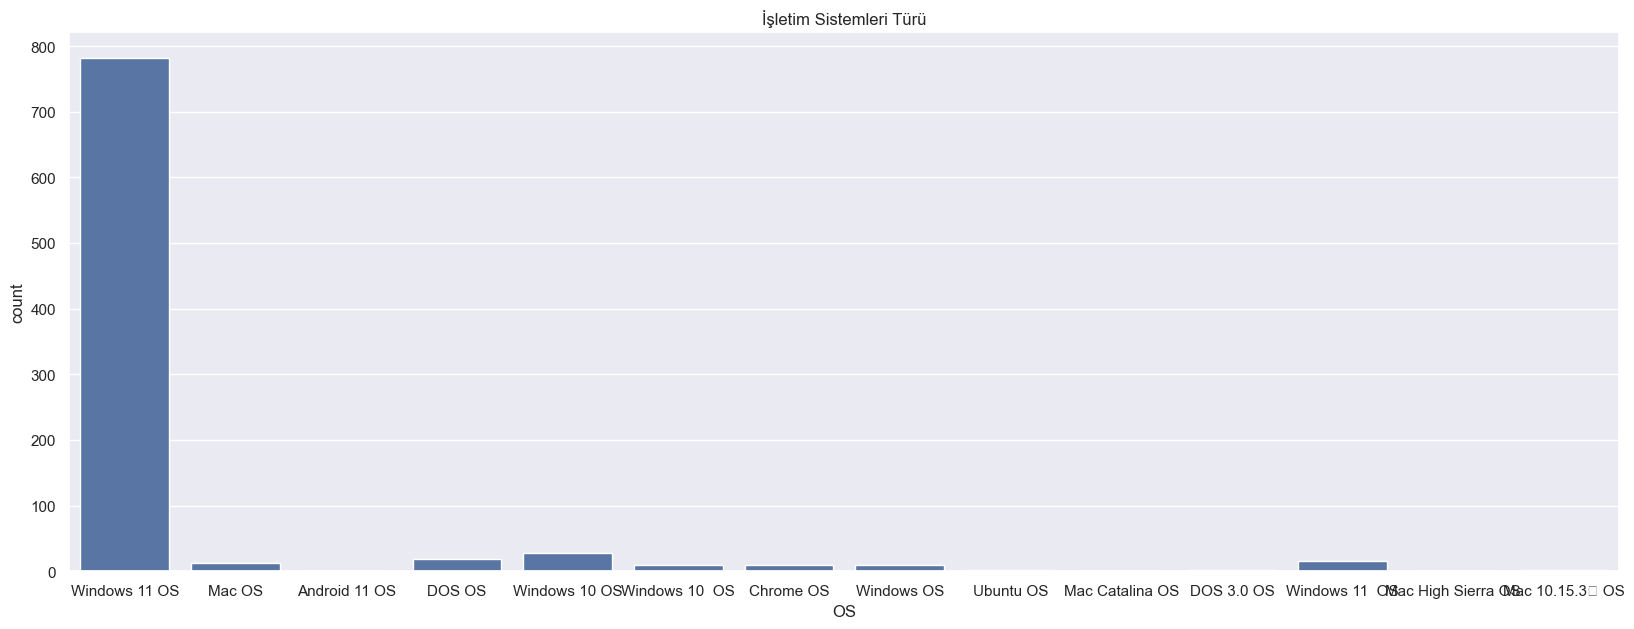

In [25]:
plt.figure(figsize=(20,7))
plt.title('İşletim Sistemleri Türü')
sns.countplot(x="OS", data=df);

In [26]:
corr = df_num.corr()
corr

,Unnamed: 0.1,Unnamed: 0,price,spec_rating,display_size,resolution_width,resolution_height,warranty
Unnamed: 0.1,1.000000,0.999665,0.162473,0.109777,-0.018512,0.028406,0.069297,0.157482
Unnamed: 0,0.999665,1.000000,0.162619,0.108691,-0.019570,0.028244,0.069869,0.158614
price,0.162473,0.162619,1.000000,0.546391,0.233815,0.586042,0.604748,0.117101
spec_rating,0.109777,0.108691,0.546391,1.000000,0.274206,0.337649,0.328525,0.109501
display_size,-0.018512,-0.019570,0.233815,0.274206,1.000000,0.125088,0.029692,0.041126
resolution_width,0.028406,0.028244,0.586042,0.337649,0.125088,1.000000,0.731557,0.024199
resolution_height,0.069297,0.069869,0.604748,0.328525,0.029692,0.731557,1.000000,-0.001060
warranty,0.157482,0.158614,0.117101,0.109501,0.041126,0.024199,-0.001060,1.000000


<Axes: >

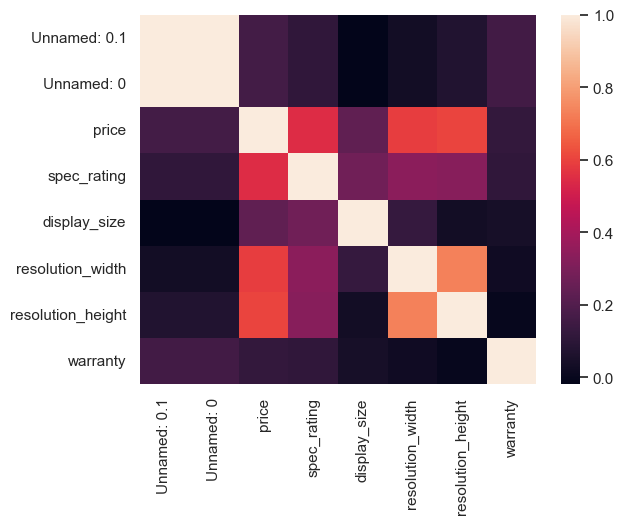

In [27]:
sns.heatmap(corr)